# In depth: Support Vector Machines

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

- Generative classification: e.g. naive bayes. Classifies by assuming an underlying distribution for each class.
- Discriminative classification: e.g. support vector machines. Just find a line, curve, or manifold that divides classes from one another.

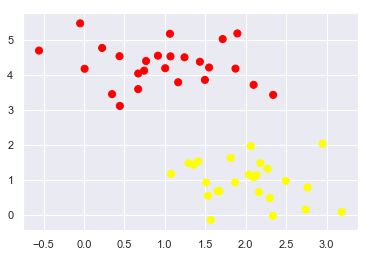

In [13]:
# Make a scatterplot from make_blobs, with an autumn color map, colored by the target array, 50 points, 2 centers, a standard deviation of 0.6 in each cluster, and a random state to keep track.


- Use support vector machines to classify the above dataset.
- Intuition: rather than drawing a zero-width line between classes, draw around each line a *margin* of some width, up to the nearest point.

In [35]:
?plt.fill_between

Signature: plt.fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, hold=None, data=None, **kwargs)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*, *y2*). This
creates one or multiple polygons describing the filled area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly. Use *step* if
the filling should be a step function, i.e. constant in between *x*.


Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, optional, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional, default: None
    Define *where* to exclude some horizontal regions from being
    filled. The filled regions are defined by the

(-1, 3.5)

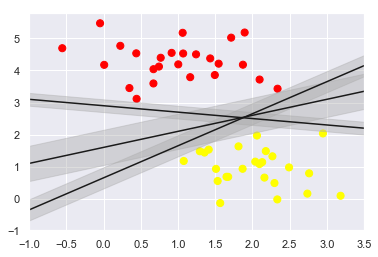

In [36]:
xfit = np.linspace(-1, 3.5)

# Make another scatter plot, same parameters as above
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

- Support vector machines find the line that maximizes the size of this margin.

### Fitting a support vector machine

In [ ]:
# Import the support vector classifier from sklearn

# Make a linear SVC, with C set to 1E10.

# Fit th